<a href="https://colab.research.google.com/github/patricktal/Deep-Learning-for-NLP/blob/master/Text_classification_sentiment_in_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer 

In [3]:
## Tokenization Example

In [4]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog',
    'Do you think my dog is amazing'
]

tokenizer = Tokenizer(num_words = 100, oov_token= "<OOV>") # num_words: max number word to keep
tokenizer.fit_on_texts(sentences) # fit the text to tokenize
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print(word_index)
print(sequences)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [5]:
 test_data = [
              'I really love my dog',
              'my dog loves my manatee'
 ]
 # When the tokenizer find a new word in the sentences, that he has never tokenized
 #really and manatee are not in the word_index see before, We use the <OOV> to fix that
 test_seq = tokenizer.texts_to_sequences(test_data)
 print(test_seq)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [6]:
## When sentences doesn't have the same sentences, use pad_sentences

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog',
    'Do you think my dog is amazing'
]

tokenizer = Tokenizer(num_words = 100, oov_token= "<OOV>") # num_words: max number word to keep
tokenizer.fit_on_texts(sentences) # fit the text to tokenize
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences) 

""" 
# we pass the sequences to the pad_sequences to pad it
# to have the zero to the right side, we have to add the property 
padding = post to the pad_sequences, You can also fit the maxlen=x to cut the
pad """

print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 0  0  0  5  3  2  4]
 [ 0  0  0  5  3  2  7]
 [ 0  0  0  6  3  2  4]
 [ 8  6  9  2  4 10 11]]


In [9]:
## Training a model to recognize sentiment in text

In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /content/sarcasm.json


--2020-06-26 15:46:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 142.250.13.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/content/sarcasm.json’

/content/sarcasm.js 100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-06-26 15:46:07 (132 MB/s) - ‘/content/sarcasm.json’ saved [5643545/5643545]



In [13]:

import numpy as np
import pandas as pd
data = pd.read_json('sample_data/sarcasm.json')
data.head()


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [14]:

import json 

with open("sample_data/sarcasm.json", 'r') as f:
  datastore = json.load(f)

In [15]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [16]:
tokenizer = Tokenizer(oov_token= "<OOV>") 
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, padding='post')

print(padded.shape)

(26709, 40)




###Let's split the data to training and testing part



In [24]:
vocab_size = 10000
training_size = 20000
testing_size = 10000
vocab_size = 10000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [33]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=100, padding="post", 
                                truncating = "post")

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding="post", 
                                truncating = "post")

In [26]:
vocab_size = 10000
embedding_dim = 16
max_length = 100

In [34]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [36]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

In [40]:
a_new_sentence = [
                  "granny starting to fear spiders in the garden might be real", 
                  "game of thrones season finale showing this sunday night"
]

sequences = tokenizer.texts_to_sequences(a_new_sentence)

padded = pad_sequences(sequences, maxlen=max_length, padding="post",
                       truncating="post")

print(model.predict(padded))

[[9.5397562e-01]
 [3.5368512e-07]]


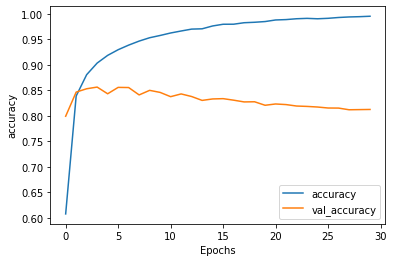

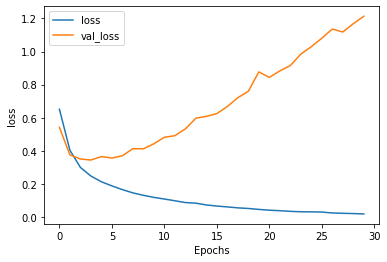

In [41]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")